In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
#from day_1 import mean_CI_model, mean_CI_data, mean_PI_model, mean_PI_data
import pandas.plotting as pd_plot
import scipy as sc


In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/liabar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

## Exercise 5.1
Consider the data on PEFR, height and, sex we looked at during today’s lecture,
PEFR.dta. We will start by looking at the men only (i.e. discard the women) and mimic
the analysis done for the women presented in the lectures.
### 1) Make a scatter plot of PEFR against height with a fitted line. Comment on what you see.
 - We can see that the data is very scattered, but it seems to
 follow an increasing  PERF with height

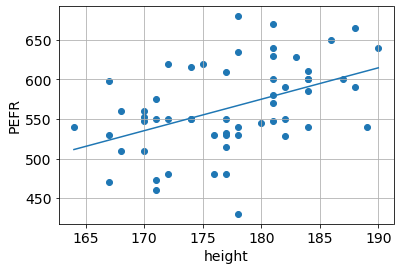

In [7]:
PEFR = pd.read_csv('data/PEFR.csv', sep=',', na_values=".")
PEFR_male = PEFR.loc[PEFR['sex'] == 'male']

# linear regression fit
slope, intercept, r_value, p_value, std_err = stats.linregress(PEFR_male['height'],PEFR_male['PEFR'])

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
ax.scatter(PEFR_male['height'], PEFR_male['PEFR'])
x = np.linspace(np.amin(PEFR_male['height']), np.amax(PEFR_male['height']))
ax.plot(x, slope*x+intercept)
ax.set_ylabel('PEFR')
ax.set_xlabel('height')
ax.grid()
plt.show()


### 2) Fit the regression line of PEFR on height. What is the estimated slope, intercept and the standard deviation of the unexplained variation?

In [9]:
X = sm.add_constant(PEFR_male['height']) 
Y = PEFR_male['PEFR']
model_male = sm.OLS(Y, X).fit()
print(model_male.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.25
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           0.000394
Time:                        22:26:53   Log-Likelihood:                -303.30
No. Observations:                  57   AIC:                             610.6
Df Residuals:                      55   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -140.3875    186.771     -0.752      0.4

In [28]:
## residues
Residuals_male = PEFR_male['PEFR'] - model_male.predict(X)
model_male_res = sm.OLS(Residuals_male, X).fit()
print(model_male_res.summary())

print('\n \n standard deviation of the residuals: ', np.std(Residuals_male))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                 1.146e-14
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               1.00
Time:                        23:08:13   Log-Likelihood:                -303.30
No. Observations:                  57   AIC:                             610.6
Df Residuals:                      55   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.669e-13    186.771   1.96e-15      1.0

For the residuals, we found:
* estimated slope = 3.203e-15 
* estimated intercept  = 3.669e-13
* standard deviation = 49.5075

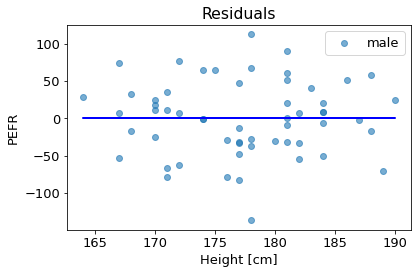

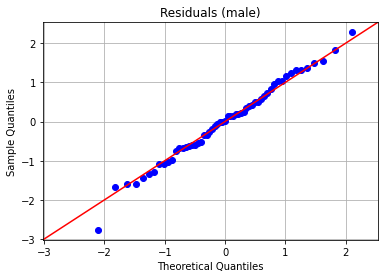

In [51]:
#%%
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 1)

ax.scatter(PEFR_male['height'], Residuals_male, color='C0', alpha=0.6, label='male')
ax.plot(PEFR_male['height'], model_male_res.predict(X), color='blue')
ax.set_xlabel('Height [cm]')
ax.set_ylabel('PEFR')
ax.legend()
plt.title('Residuals')
plt.tight_layout()
plt.show()

## QQ-plot of the residuals
plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_male, fit=True, line='45')
plt.title('Residuals (male)')
plt.grid()
plt.show()


### 3) Generate a new variable height170=height-170 and fit the regression line of PEFR on height170. What is the estimated slope, intercept and the standard deviation of the unexplained variation? Compare with what you found in 2. What is the interpretation of the intercept? Is the slope statistically significant different from zero?



In [52]:
PEFR_male['height170'] = PEFR_male['height'] - 170

X_170 = sm.add_constant(PEFR_male['height170']) 
model_male_170 = sm.OLS(Y, X_170).fit()
print(model_male_170.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     14.25
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           0.000394
Time:                        00:12:25   Log-Likelihood:                -303.30
No. Observations:                  57   AIC:                             610.6
Df Residuals:                      55   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        535.2740     10.178     52.590      0.0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
## residues
Residuals_male_170 = PEFR_male['PEFR'] - model_male_170.predict(X_170)
model_male_res_170 = sm.OLS(Residuals_male_170, X_170).fit()
print(model_male_res_170.summary())

print('\n \n standard deviation of the residuals: ', np.std(Residuals_male_170))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                 1.146e-14
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               1.00
Time:                        00:17:47   Log-Likelihood:                -303.30
No. Observations:                  57   AIC:                             610.6
Df Residuals:                      55   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.406e-13     10.178   1.38e-14      1.0

The interpretation of the intercept is the PEFR value for a person whose height is 170 cm.
* the intercept is 3.9745 (95% CI: 1.1865, 6.084)
* the slope is 535.2740 (95% CI: 514.876, 555.672)

For the residuals, we find:
* standard deviation of 49.5075
* the slope is not statistically significant from 0 (95% CI: -2.11, 2.11)

### 4) Generate the predicted values and the residuals under this model. Make a plot of the residuals against the predicted values and the residuals against height170. Comment on what you see.

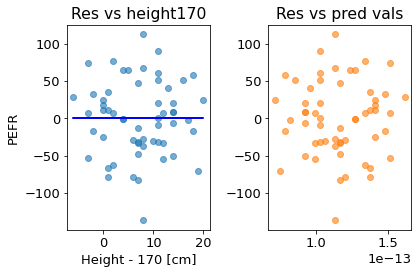

In [73]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(1, 2)

ax[0].scatter(PEFR_male['height170'], Residuals_male_170, color='C0', alpha=0.6, label='male')
ax[0].plot(PEFR_male['height170'], model_male_res_170.predict(X_170), color='blue')
ax[0].set_xlabel('Height - 170 [cm]')
ax[0].set_ylabel('PEFR')
#ax[0].legend()
ax[0].set_title('Res vs height170')

ax[1].set_title('Res vs pred vals')
ax[1].scatter(model_male_res_170.predict(X_170), Residuals_male_170, color='C1', alpha=0.6, )

plt.tight_layout()
plt.show()

The data seems normally distributed in both cases.

### 5) Make a QQ-plot of the residuals. Comment on what you see. We will now look at both sexes.

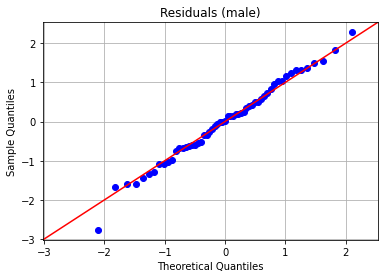

In [74]:
## QQ-plot of the residuals
plt.rcParams.update({'font.size': 10})
sm.qqplot(Residuals_male_170, fit=True, line='45')
plt.title('Residuals (male)')
plt.grid()
plt.show()

### 6) Run the commands regress PEFR b1.sex##c.height170 regress PEFR b2.sex##c.height170 and compare with model 2 in the lecture notes.

### 7) Run the commands: regress PEFR b1.sex c.height170 lincom _cons + 2.sex and compare with model 3 in the lecture notes.